In [1]:
from hail import Table
import os
import pprint
from pprint import pformat
import argparse
import hail as hl
import pandas as pd
import numpy as np
import pyspark
from pprint import pformat
import json
import sys
import re
from pathlib import Path
import logging
from typing import Any, Counter, List, Optional, Tuple, Union, Dict,Set
import uuid
import json
from matplotlib import pyplot as plt
from typing import Any, Counter, List, Optional, Tuple, Union,Dict,Set
from hail.plot import show, output_notebook
from gnomad.utils.plotting import *
from typing import Set, Tuple
from bokeh.palettes import d3  # pylint: disable=no-name-in-module
from bokeh.models import Plot, Row, Span, NumeralTickFormatter, LabelSet
import warnings; 
warnings.simplefilter('ignore')
tmp_dir = "hdfs://spark-master:9820/"
temp_dir = "file:///home/ubuntu/data/tmp"
#plot_dir = "/home/ubuntu/data/tmp"
plot_dir="/lustre/scratch123/teams/hgi/mercury/megaWES-variantqc"
lustre_dir = "file:///lustre/scratch123/teams/hgi/mercury/megaWES-variantqc"

sc = pyspark.SparkContext()
hadoop_config = sc._jsc.hadoopConfiguration()
hadoop_config.set("fs.s3a.access.key", "8YY584J59H7Q6AVKHSU8")
hadoop_config.set("fs.s3a.secret.key", "P8vePa7JUvxKXX2me9ti1cGujgYWMoimAwx4mMlM")
hadoop_config.set("fs.gs.impl", "com.google.cloud.hadoop.fs.gcs.GoogleHadoopFileSystem")
hadoop_config.set("fs.AbstractFileSystem.gs.impl", "com.google.cloud.hadoop.fs.gcs.GoogleHadoopFS")
hl.init(sc=sc, tmp_dir=lustre_dir, local_tmpdir=lustre_dir, default_reference="GRCh38")
output_notebook()


pip-installed Hail requires additional configuration options in Spark referring
  to the path to the Hail Python module directory HAIL_DIR,
  e.g. /path/to/python/site-packages/hail:
    spark.jars=HAIL_DIR/hail-all-spark.jar
    spark.driver.extraClassPath=HAIL_DIR/hail-all-spark.jar
    spark.executor.extraClassPath=./hail-all-spark.jarRunning on Apache Spark version 2.4.7
SparkUI available at http://spark-master:4040
Welcome to
     __  __     <>__
    / /_/ /__  __/ /
   / __  / _ `/ / /
  /_/ /_/\_,_/_/_/   version 0.2.62-84fa81b9ea3d
LOGGING: writing to /home/ubuntu/data/scripts/exomeQC-hail-gnomad/notebooks/hail-20210708-1351-0.2.62-84fa81b9ea3d.log


Loading BokehJS ...

In [2]:
ht=hl.read_table(f'{lustre_dir}/variant_qc/models/91ba5f38/rf_result_MegaWES_new.ht')

In [2]:
n=10000
df = pd.read_csv(f'{lustre_dir}/variant_qc/91ba5f38_RF_table.tsv.bgz', sep="\t",compression='gzip',header=0, skiprows=lambda i: i % n != 0)


In [3]:
df.columns


Index(['locus', 'alleles', 'a_index', 'was_split', 'InbreedingCoeff',
       'variant_type', 'allele_type', 'n_alt_alleles', 'was_mixed', 'has_star',
       'MQ', 'QD', 'MQRankSum', 'SOR', 'ReadPosRankSum', 'hapmap', 'omni',
       'mills', 'kgp_phase1_hc', 'transmitted_singleton', 'fail_hard_filters',
       'ac_raw', 'feature_imputed.a_index', 'feature_imputed.n_alt_alleles',
       'feature_imputed.MQ', 'feature_imputed.QD', 'feature_imputed.MQRankSum',
       'feature_imputed.SOR', 'feature_imputed.ReadPosRankSum', 'tp', 'fp',
       'rf_train', 'rf_label', 'rf_test', 'rf_probability', 'rf_prediction'],
      dtype='object')

In [47]:
n=5000
df1 = pd.read_csv(f'{lustre_dir}/variant_qc/91ba5f38_RF_table.tsv.bgz', sep="\t",compression='gzip',header=0, skiprows=lambda i: i % n != 0)


In [48]:
df1['TP_rf_probability']=df1.rf_probability.apply(lambda x:json.loads(x)[1]['value'])
df1['FP_rf_probability']=df1.rf_probability.apply(lambda x:json.loads(x)[0]['value'])

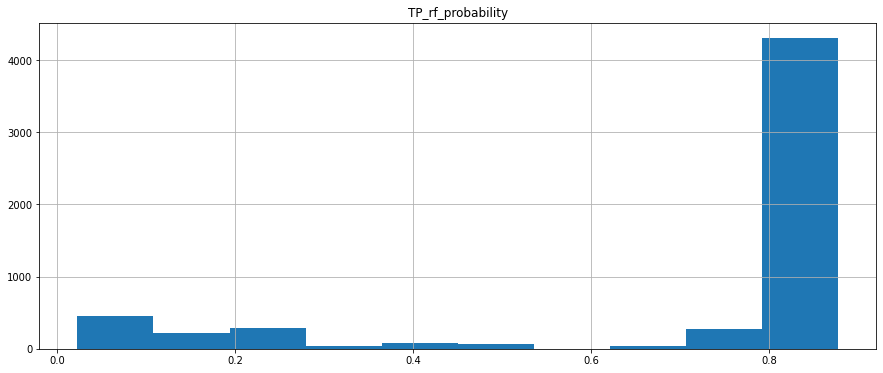

In [74]:
p=df1.hist('TP_rf_probability', bins=10, figsize=(15, 6))


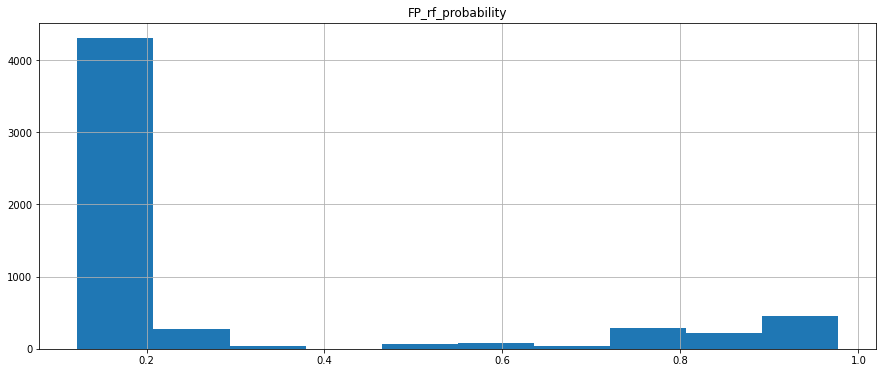

In [76]:
q=df1.hist('FP_rf_probability',bins=10,figsize=(15, 6))

In [55]:
df1['TP_rf_probability'].describe()

count    5760.000000
mean        0.713279
std         0.273609
min         0.022589
25%         0.791438
50%         0.848055
75%         0.862883
max         0.877710
Name: TP_rf_probability, dtype: float64

In [56]:
df1['FP_rf_probability'].describe()

count    5760.000000
mean        0.286721
std         0.273609
min         0.122290
25%         0.137117
50%         0.151945
75%         0.208562
max         0.977411
Name: FP_rf_probability, dtype: float64

<AxesSubplot:>

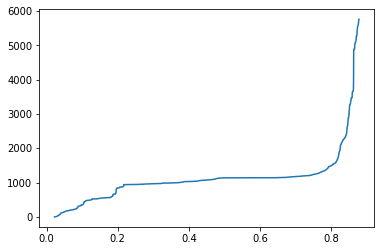

In [57]:
cdf = df1['TP_rf_probability'].value_counts().sort_index().cumsum()
cdf.plot()

<AxesSubplot:>

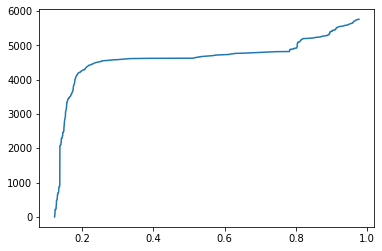

In [59]:
cdf = df1['FP_rf_probability'].value_counts().sort_index().cumsum()
cdf.plot()

In [65]:
df1['TP_rf_probability'].value_counts()

0.862883    916
0.862640    237
0.870088     70
0.872509     70
0.858902     69
           ... 
0.648847      1
0.877710      1
0.826818      1
0.773545      1
0.799990      1
Name: TP_rf_probability, Length: 1406, dtype: int64